# Fourier approximation terrain

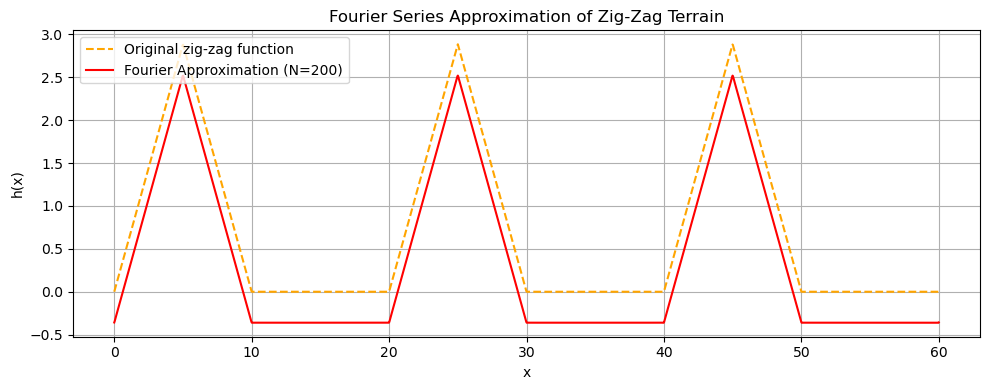

In [10]:
import numpy as np
import matplotlib.pyplot as plt

r = 5.0                
d = 10.0               
theta = np.pi / 6      
T = 2 * r + d          
N = 200                 
h0 = r * np.tan(theta)  

def h_piecewise(x):
    xk = x % T
    if 0 <= xk < r:
        return np.tan(theta) * xk
    elif r <= xk < 2 * r:
        return np.tan(theta) * (2 * r - xk)
    else:
        return 0.0

h_vec = np.vectorize(h_piecewise)

res = 1000
x_vals = np.linspace(0, T, res)
dx = x_vals[1] - x_vals[0]
h_vals = h_vec(x_vals)

a0 = (1 / T) * np.sum(h_vals) * dx

an = []
bn = []

for n in range(1, N + 1):
    cos_term = np.cos(2 * np.pi * n * x_vals / T)
    sin_term = np.sin(2 * np.pi * n * x_vals / T)
    an_n = (2 / T) * np.sum(h_vals * cos_term) * dx
    bn_n = (2 / T) * np.sum(h_vals * sin_term) * dx
    an.append(an_n)
    bn.append(bn_n)

x_plot = np.linspace(0, 3 * T, 2000)
h_approx = np.full_like(x_plot, a0 / 2)  

for n in range(1, N + 1):
    h_approx += an[n - 1] * np.cos(2 * np.pi * n * x_plot / T) \
              + bn[n - 1] * np.sin(2 * np.pi * n * x_plot / T)

h_true = h_vec(x_plot)

plt.figure(figsize=(10, 4))
plt.plot(x_plot, h_true, '--', color='orange', label='Original zig-zag function')
plt.plot(x_plot, h_approx, 'r', label=f'Fourier Approximation (N={N})')
plt.xlabel('x')
plt.ylabel('h(x)')
plt.title('Fourier Series Approximation of Zig-Zag Terrain')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
